# SGD

In [7]:
import numpy as np

# The target function is f(w1,w2) = 0.1w_1^2 + 2w_2^2
def dW(W):
    dW1 = 2 * 0.1 * W[0]
    dW2 = 2 * 2 * W[1]
    dW = np.array([dW1, dW2])
    return dW

def sgd(W, dW, lr):
    W = W - lr * dW
    return W

def train_p1(optimizer, lr, epochs):
    W = np.array([-5,-2], dtype = np.float32)
    result = [W]
    for i in range(epochs):
        dW_ = dW(W)
        W = optimizer(W, dW_, lr)
        result.append(W)
    return result


In [8]:
train_p1(sgd, lr=0.4, epochs=30)

[array([-5., -2.], dtype=float32),
 array([-4.6,  1.2]),
 array([-4.232, -0.72 ]),
 array([-3.89344,  0.432  ]),
 array([-3.5819648, -0.2592   ]),
 array([-3.29540762,  0.15552   ]),
 array([-3.03177501, -0.093312  ]),
 array([-2.78923301,  0.0559872 ]),
 array([-2.56609437, -0.03359232]),
 array([-2.36080682,  0.02015539]),
 array([-2.17194227, -0.01209324]),
 array([-1.99818689,  0.00725594]),
 array([-1.83833194, -0.00435356]),
 array([-1.69126538,  0.00261214]),
 array([-1.55596415, -0.00156728]),
 array([-1.43148702e+00,  9.40369969e-04]),
 array([-1.31696806e+00, -5.64221981e-04]),
 array([-1.21161061e+00,  3.38533189e-04]),
 array([-1.11468176e+00, -2.03119913e-04]),
 array([-1.02550722e+00,  1.21871948e-04]),
 array([-9.43466646e-01, -7.31231688e-05]),
 array([-8.67989314e-01,  4.38739013e-05]),
 array([-7.98550169e-01, -2.63243408e-05]),
 array([-7.34666155e-01,  1.57946045e-05]),
 array([-6.75892863e-01, -9.47676268e-06]),
 array([-6.21821434e-01,  5.68605761e-06]),
 array([-

# SGD with momentum

In [20]:
def df_W(w):
    dw1 = 2 * 0.1 * w[0]
    dw2 = 2 * 2 * w[1]
    dw = np.array([dw1, dw2])
    return dw

def sgd_momentum(w, dw, lr, v, beta):
    v = beta * v + (1 - beta) * dw
    w = w - lr * v
    return w, v

def train_p2(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    V = np.array([0, 0], dtype=np.float32)
    result = [W]

    for _ in range(epochs):
        dW = df_W(W)
        W, V = optimizer(W, dW, lr, V, beta=0.5)
        result.append(W)
    
    return result

In [21]:
train_p2(sgd_momentum, lr=0.6, epochs=30)

[array([-5., -2.], dtype=float32),
 array([-4.7,  0.4]),
 array([-4.268,  1.12 ]),
 array([-3.79592,  0.136  ]),
 array([-3.3321248, -0.5192   ]),
 array([-2.90029971, -0.22376   ]),
 array([-2.51036919,  0.192472  ]),
 array([-2.16478177,  0.1696216 ]),
 array([-1.86210116, -0.04534952]),
 array([-1.59903478, -0.09841566]),
 array([-1.37155951, -0.00684994]),
 array([-1.1755283 ,  0.04715285]),
 array([-1.006981  ,  0.01757082]),
 array([-0.86228849, -0.01830518]),
 array([-0.73820492, -0.01427696]),
 array([-0.63187084,  0.0048695 ]),
 array([-0.54079155,  0.00859933]),
 array([-4.62804416e-01,  1.45050014e-04]),
 array([-0.39604258, -0.00425615]),
 array([-0.33889911, -0.00134937]),
 array([-0.28999343,  0.00172326]),
 array([-0.24814098,  0.00119166]),
 array([-0.2123263 , -0.00050413]),
 array([-0.18167938, -0.00074707]),
 array([-1.55455157e-01,  2.79448010e-05]),
 array([-0.13301574,  0.00038192]),
 array([-1.13815082e-01,  1.00603444e-04]),
 array([-0.09738585, -0.00016078]),
 

# RMSPROP

In [11]:
def df_W(W):
    dW1 = 2 * 0.1 * W[0]
    dW2 = 2 * 2 * W[1]
    dW = np.array([dW1, dW2])
    return dW
    
def RMSProp(W, dW, lr, S, gamma):
    epsilon = 1e-6
    S = gamma * S + (1 - gamma) * dW**2
    W = W - lr * dW / (np.sqrt(S) + epsilon)
    return W, S

def train_p3(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    S = np.array([0, 0], dtype=np.float32)
    results = [W]
    
    for _ in range(epochs):
        dW_ = df_W(W)
        W, S = optimizer(W, dW_, lr, S, gamma=0.9)
        results.append(W)
    return results

In [12]:
train_p3(RMSProp, lr=0.3, epochs=30)

[array([-5., -2.], dtype=float32),
 array([-4.0513197 , -1.05131708]),
 array([-3.43519553, -0.59152376]),
 array([-2.95893489, -0.3294397 ]),
 array([-2.56546089, -0.17756504]),
 array([-2.22920358, -0.09163272]),
 array([-1.93626564, -0.04494508]),
 array([-1.67817504, -0.02081429]),
 array([-1.44934809, -0.00903562]),
 array([-1.24588029, -0.00364592]),
 array([-1.06490135, -0.00135352]),
 array([-9.04200650e-01, -4.56447225e-04]),
 array([-7.61994932e-01, -1.37563947e-04]),
 array([-6.36776983e-01, -3.62604278e-05]),
 array([-5.27213771e-01, -8.11346375e-06]),
 array([-4.32077091e-01, -1.47475425e-06]),
 array([-3.50197152e-01, -2.02787524e-07]),
 array([-2.80433359e-01, -1.84235524e-08]),
 array([-2.21658617e-01, -7.67771777e-10]),
 array([-1.72754375e-01,  7.80432778e-12]),
 array([-1.32614084e-01, -5.05777072e-13]),
 array([-1.00152823e-01,  6.19098174e-14]),
 array([-7.43209130e-02, -1.13368674e-14]),
 array([-5.41193712e-02,  2.80153177e-15]),
 array([-3.86152607e-02, -8.81296

# Adam

In [19]:
def df_W(W):
    dW1 = 2 * 0.1 * W[0]
    dW2 = 2 * 2 * W[1]
    dW = np.array([dW1, dW2])
    return dW
    
def Adam(W, dW, lr, V, S, beta1,beta2,t):
    epsilon = 1e-6
    V = beta1 * V + (1 - beta1) * dW
    S = beta2 * S + (1 - beta2) * dW**2
    V_ = V / (1 - beta1**t)
    S_ = S / (1 - beta2**t)
    W = W - lr * V_ / (np.sqrt(S_) + epsilon)
    return W, V, S

def train_p3(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    V = np.array([0, 0], dtype=np.float32)
    S = np.array([0, 0], dtype=np.float32)
    results = [W]
    
    for _ in range(epochs):
        dW_ = df_W(W)
        W, V,S = optimizer(W, dW_, lr, V, S, beta1=0.9, beta2=0.999, t=_+1)
        results.append(W)
    return results

In [20]:
train_p3(Adam, lr=0.2, epochs=30)

[array([-5., -2.], dtype=float32),
 array([-4.8000002 , -1.80000002]),
 array([-4.60025478, -1.60082451]),
 array([-4.40094848, -1.40317262]),
 array([-4.20227764, -1.20787822]),
 array([-4.00445033, -1.01592745]),
 array([-3.80768638, -0.82847307]),
 array([-3.61221732, -0.64684159]),
 array([-3.41828623, -0.47252765]),
 array([-3.22614739, -0.30716934]),
 array([-3.03606592, -0.15249855]),
 array([-2.84831706, -0.01026326]),
 array([-2.66318543,  0.11787552]),
 array([-2.480964  ,  0.23046161]),
 array([-2.30195279,  0.3263587 ]),
 array([-2.12645742,  0.40484195]),
 array([-1.95478732,  0.46564961]),
 array([-1.7872537 ,  0.50898799]),
 array([-1.62416726,  0.53549442]),
 array([-1.46583566,  0.54617144]),
 array([-1.31256067,  0.54230812]),
 array([-1.16463526,  0.52540206]),
 array([-1.02234036,  0.4970906 ]),
 array([-0.88594163,  0.4590951 ]),
 array([-0.75568617,  0.41317781]),
 array([-0.63179919,  0.3611089 ]),
 array([-0.51448089,  0.30464048]),
 array([-0.40390346,  0.24548

# Vanishing Gradient

In [26]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import numpy as np
device = torch.device('mps' if torch.mps.is_available() else 'cpu')
torch.manual_seed(42)

In [27]:
device

device(type='mps')

In [28]:
BATCH_SIZE = 512
EPOCHS = 300
lr = 0.01


In [30]:
train_dataset = FashionMNIST(root='./data', train=True, download=False, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, BATCH_SIZE, shuffle=True)
test_dataset = FashionMNIST(root='./data', train=False, download=False, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, BATCH_SIZE)

In [31]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        x = self.layer4(x)
        x = self.sigmoid(x)
        x = self.layer5(x)
        x = self.sigmoid(x)
        out = self.output(x)
        return out

In [42]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)


In [47]:
def train(model, train_loader, test_loader, loss_fn, optimizer, num_epochs):
    train_losses = []
    train_acc = []
    val_losses = []
    val_acc = []
    for epoch in range(num_epochs):
        model.train()
        t_loss = 0
        t_acc = 0
        cnt = 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(X)
            loss = loss_fn(outputs, y)
            loss.backward()
            optimizer.step()
            t_loss += loss.item()
            t_acc += (torch.argmax(outputs, 1) == y).sum().item()
            cnt += len(y)
        t_loss /= len(train_loader)
        train_losses.append(t_loss)
        t_acc /= cnt
        train_acc.append(t_acc)

        model.eval()
        v_loss = 0
        v_acc = 0
        cnt = 0
        with torch.no_grad():
            for X, y in test_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X)
                loss = loss_fn(outputs, y)
                v_loss += loss.item()
                v_acc += (torch.argmax(outputs, 1)==y).sum().item()
                cnt += len(y)
        v_loss /= len(test_loader)
        val_losses.append(v_loss)
        v_acc /= cnt
        val_acc.append(v_acc)
        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}")
    return train_losses, train_acc, val_losses, val_acc

In [48]:
train_losses, train_acc, val_losses, val_acc = train(model, train_loader, test_loader, criterion, optimizer, EPOCHS)

Epoch 1/300, Train_Loss: 0.1757, Train_Acc: 0.9347, Validation Loss: 0.4328, Val_Acc: 0.8674
Epoch 11/300, Train_Loss: 0.1691, Train_Acc: 0.9372, Validation Loss: 0.4247, Val_Acc: 0.8771
Epoch 21/300, Train_Loss: 0.1528, Train_Acc: 0.9443, Validation Loss: 0.4297, Val_Acc: 0.8811
Epoch 31/300, Train_Loss: 0.1485, Train_Acc: 0.9457, Validation Loss: 0.4517, Val_Acc: 0.8803
Epoch 41/300, Train_Loss: 0.1384, Train_Acc: 0.9495, Validation Loss: 0.4729, Val_Acc: 0.8762
Epoch 51/300, Train_Loss: 0.1383, Train_Acc: 0.9491, Validation Loss: 0.4905, Val_Acc: 0.8763
Epoch 61/300, Train_Loss: 0.1247, Train_Acc: 0.9551, Validation Loss: 0.4995, Val_Acc: 0.8796
Epoch 71/300, Train_Loss: 0.1284, Train_Acc: 0.9529, Validation Loss: 0.4780, Val_Acc: 0.8789
Epoch 81/300, Train_Loss: 0.1177, Train_Acc: 0.9572, Validation Loss: 0.4979, Val_Acc: 0.8768
Epoch 91/300, Train_Loss: 0.1073, Train_Acc: 0.9603, Validation Loss: 0.5405, Val_Acc: 0.8806
Epoch 101/300, Train_Loss: 0.1040, Train_Acc: 0.9624, Validat

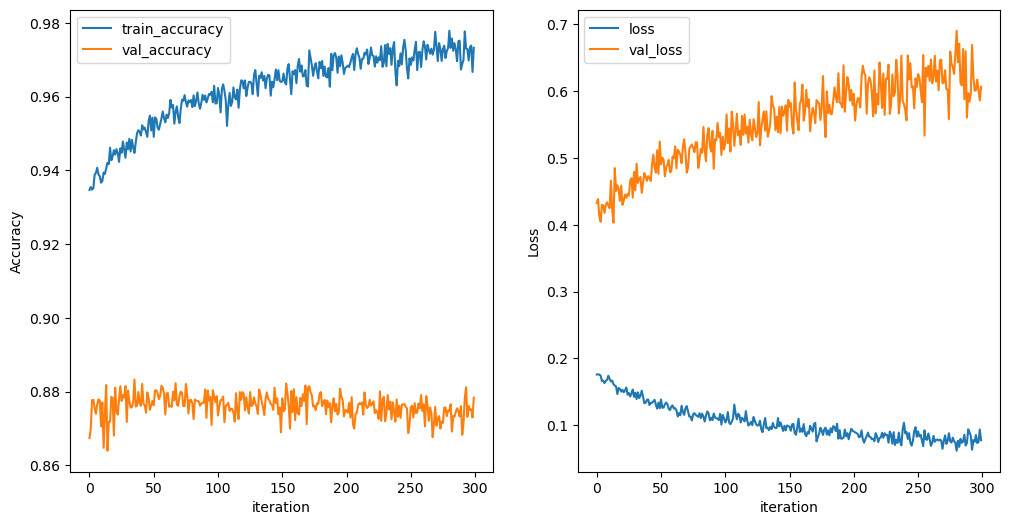

In [49]:
import matplotlib.pyplot as plt

def plot(train_losses, train_acc, val_losses, val_acc):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_acc, label='train_accuracy')
    plt.plot(val_acc, label='val_accuracy')
    plt.xlabel('iteration')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='loss')
    plt.plot(val_losses, label='val_loss')
    plt.xlabel('iteration')
    plt.ylabel('Loss')
    plt.legend()
    
plot(train_losses, train_acc, val_losses, val_acc)